In [1]:

import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
url="https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv"
df=pd.read_csv(url)
df
df.to_csv("Titanic.csv",sep='\t')

In [2]:
df1=pd.read_csv(url)

df1.to_csv("Titanic.csv",sep='\t')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
len(df)

891

Here PassengerId,Age,Ticket,Cabin columns has categorical(ordinal) data type and Survived,Pclass,Sex,SibSp,Parch,Embarked has categorical(nominal)data type and Fare has continous data type.so it is classification problem since the target column Survived has categorical(nominal)data type.	

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#checking null values of features
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Replace null values of column with median value since it is a Age column
from sklearn.impute import SimpleImputer
import numpy as np
imp=SimpleImputer(missing_values=np.NaN,strategy="median")
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))
df1['Age']=imp.fit_transform(df1['Age'].values.reshape(-1,1))


In [9]:
#Replace null values of column with mode value since it is a string data type column
imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))
df1['Embarked']=imp.fit_transform(df1['Embarked'].values.reshape(-1,1))

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

here the cabin column has null values above 35% of entire entries.so we can better drop this.since so many entries are there need to be replaced arbitrarily.

In [11]:
# seperate the data into numeric and categorical
df_num = df[['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived','Pclass','Sex','Embarked']]

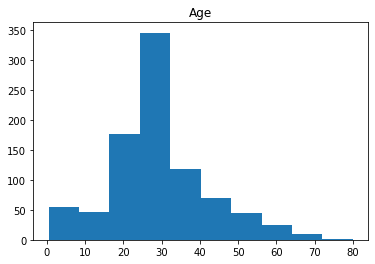

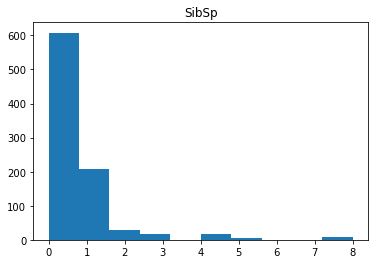

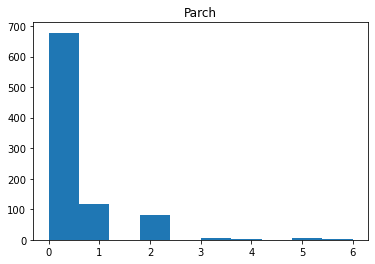

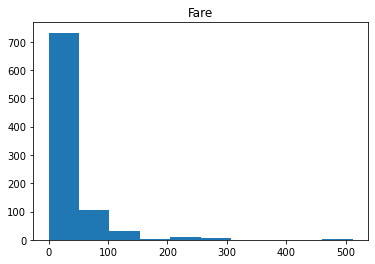

In [12]:
for i in df_num.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

Here age column is slightly normally distributed.we can observe the most people travelled in titatnic are in the age of 30.there are very less old age people travelled since Age >50 is very less.middle age people in range 20 to 40 travelled more.

We can observe there are more people travelled without any spouse and siblings.so people  travelled in ship alone only more.

Again,we can observe there are more people travelled without any parents and children.so people  travelled in ship alone only more.
since we can see there are very less number of people are travelled with parents and children 

The ticket fare is highly reasonable rate since it is not crossed above hundreds




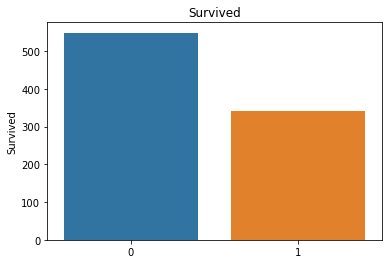

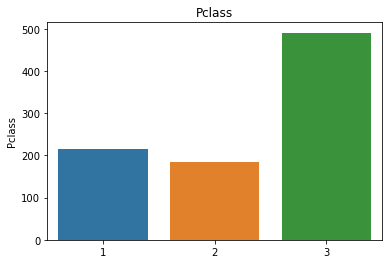

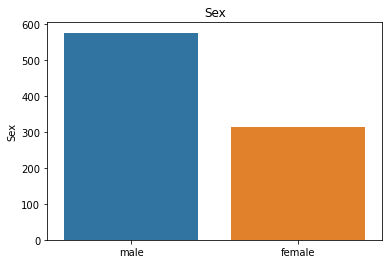

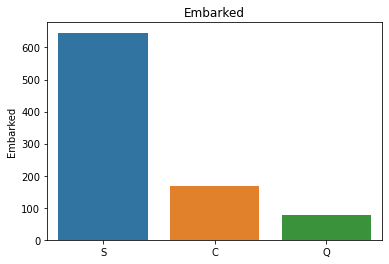

In [13]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

The third class people are travelled more in the ship than first and second class people.
 
The number of males travelled are more than number of females travelled.

The number of people Embarked to 'S' are more than number of people embarked to 'C' and 'Q'

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

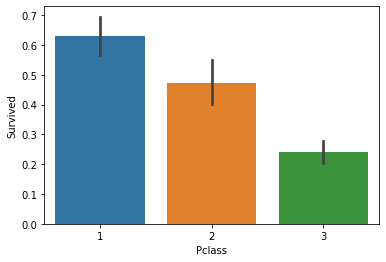

In [14]:
sns.barplot(x='Pclass', y='Survived', data=df)

The first class people survival rate is more than second and third class people survival rate.so the people who payed more got survived better we could able to understand from here.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

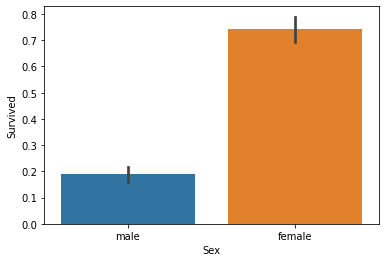

In [15]:
sns.barplot(x='Sex', y='Survived', data=df)

The number of females survival rate is more than the number of male survival rate

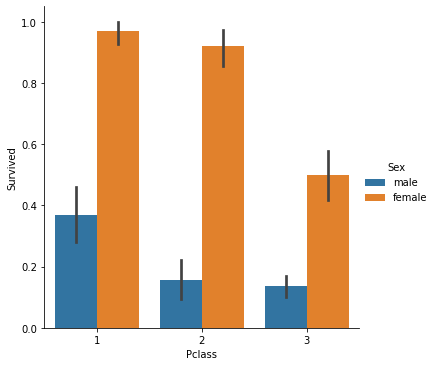

In [16]:
g=sns.catplot(x="Pclass",y="Survived",hue="Sex",data=df,kind="bar")
plt.show()

The number of females in first class survived more than overall survived and also it is more than male survived in first class itself.the male people in third class are least survived than all people. 

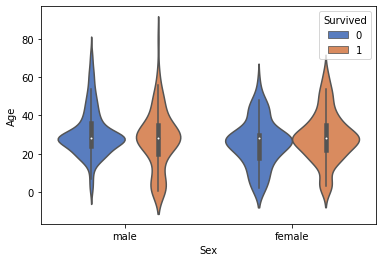

In [17]:
ax = sns.violinplot(x="Sex", y="Age", hue="Survived",
                    data=df, palette="muted")

Male and Female  in Age group 20 to 40 are survived more 

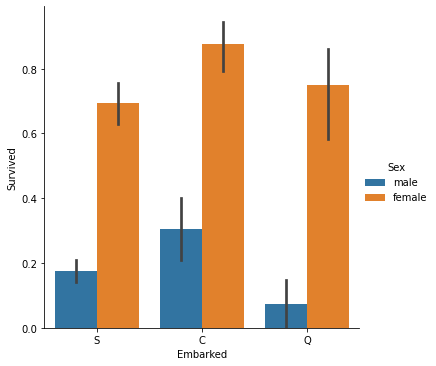

In [18]:
p=sns.catplot(x="Embarked",y="Survived",hue="Sex",data=df,kind="bar")
plt.show()

Female who embarked to 'C' are survived more than everyone else.The male who embarked to 'Q' are very less than compared to others.

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

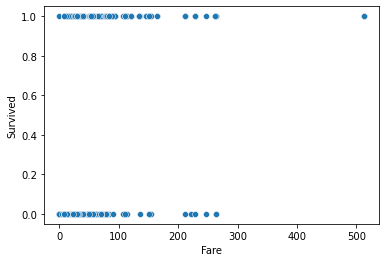

In [19]:
sns.scatterplot(x="Fare",y="Survived",data=df)

The people who payed more Fare are survived more

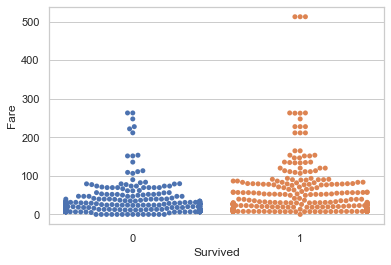

In [20]:
ax=sns.set(style="whitegrid")
ax=sns.swarmplot(x="Survived", y="Fare", data=df)


The people who payed more Fare are survived more

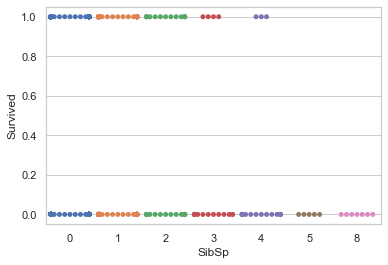

In [21]:
ax=sns.set(style="whitegrid")
ax=sns.swarmplot(x="SibSp", y="Survived", data=df)


people with less siblings and spouses are survived more

In [22]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


These are Pclass,Sex,Embarked and their survival details

In [23]:
# n stands for null
# in this case we will treat null values like it's own category

df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])
#comparing survival rates by cabin
print(df.cabin_adv.value_counts())
pd.pivot_table(df,index='Survived',columns='cabin_adv', 
                        values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


These are details of people who are staying in each cabins and also it is included with people with no details of their cabin.so it is mentioned as null

In [24]:
df['child']=['child' if df['Age'][i]<=15  else 'not child' for i in df.index]
df.groupby(['child'])['Survived'].value_counts()

child      Survived
child      1            49
           0            34
not child  0           515
           1           293
Name: Survived, dtype: int64

we can observe that how many are child and how many are not child in the ship and their survival rate

In [25]:
df.Name.head(50)
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())
df['name_title'].value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Mme               1
Don               1
Lady              1
Ms                1
the Countess      1
Sir               1
Capt              1
Jonkheer          1
Name: name_title, dtype: int64

We can observe that people and their role in ship and we can know how many are normal people and how many are working in ship how many miss and mrs etc.,thus we can know the people's details

In [26]:
df1=df1.drop(['Cabin'],axis=1)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


since cabin column has large number of null we could n't able to fill for all people with mode value arbitrarily,becoz people may not live in that cabin.so this column is of not much use now.so we can drop it

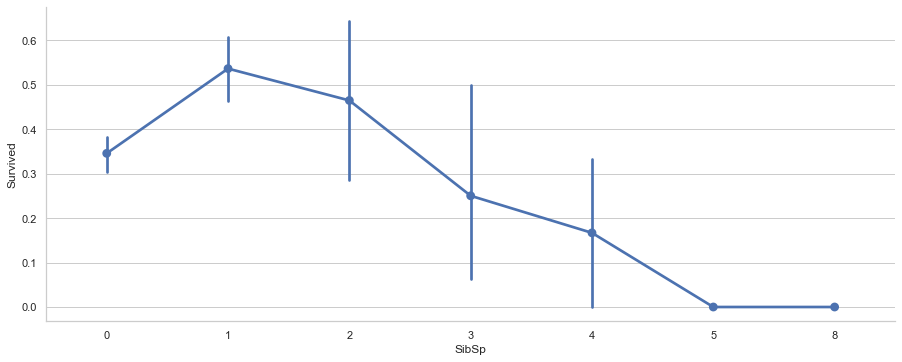

In [27]:
axes = sns.factorplot('SibSp','Survived', data=df1, aspect = 2.5, )


people with less number of siblings and spouses are survived more



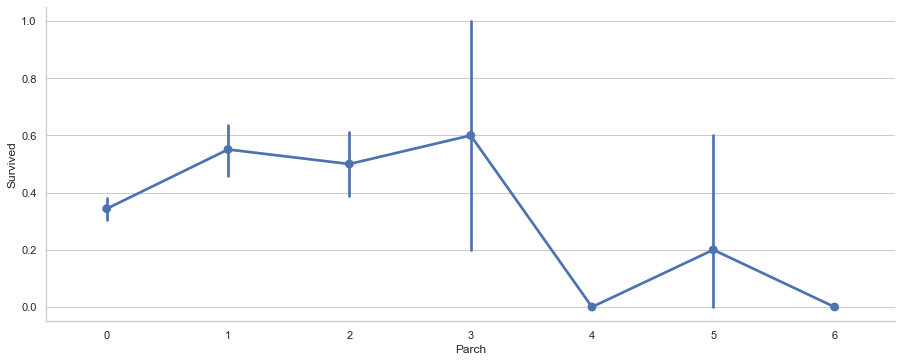

In [28]:
axes = sns.factorplot('Parch','Survived', data=df1, aspect = 2.5, )

people with less number of parents and childrens are survived more

In [29]:
df1['familysize']=df1['SibSp']+df['Parch']      # combine the features and check correlation again and drop if not wanted
df1.drop(['SibSp','Parch'],axis=1,inplace=True)

combine the number of spouse,siblings and parent,children columns since it come under same family.

In [30]:
df1['Alone']=[0 if df1['familysize'][i]>0 else 1 for i in df1.index]    # if familysize is 0 means they are alone so assign value 1 to alone feature.Alone=1 indicates the value is true here
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familysize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [31]:
df1.groupby(['Alone'])['Survived'].mean()    

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

This tells survival rate of people who are alone

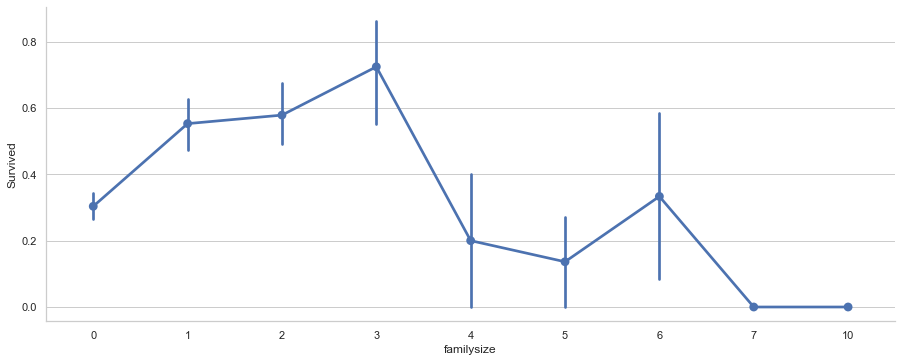

In [32]:
axes = sns.factorplot('familysize','Survived', data=df1, aspect = 2.5, )


People with less number of familysize has less survival rate

In [33]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['Ticket','Sex','Embarked','Name']

for val in list1:
    df1[val]=le.fit_transform(df1[val].astype(str))
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familysize,Alone
0,1,0,3,108,1,22.0,523,7.2500,2,1,0
1,2,1,1,190,0,38.0,596,71.2833,0,1,0
2,3,1,3,353,0,26.0,669,7.9250,2,0,1
3,4,1,1,272,0,35.0,49,53.1000,2,1,0
4,5,0,3,15,1,35.0,472,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,101,13.0000,2,0,1
887,888,1,1,303,0,19.0,14,30.0000,2,0,1
888,889,0,3,413,0,28.0,675,23.4500,2,3,0
889,890,1,1,81,1,26.0,8,30.0000,0,0,1


In [34]:
#find correlation co.efficient of all variables in table
df1.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familysize,Alone
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.056554,0.012658,0.013128,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.164549,0.257307,-0.167675,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.319869,-0.549500,0.162098,0.065997,0.135207
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,0.047348,-0.049173,-0.006117,-0.036309,0.070722
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,0.059372,-0.182333,0.108262,-0.200988,0.303646
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.070382,0.096688,-0.018754,-0.245619,0.171647
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,1.000000,-0.013885,-0.001729,0.064302,0.028314
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,-0.013885,1.000000,-0.224719,0.217138,-0.271832
Embarked,0.013128,-0.167675,0.162098,-0.006117,0.108262,-0.018754,-0.001729,-0.224719,1.000000,0.066516,0.063532
familysize,-0.040143,0.016639,0.065997,-0.036309,-0.200988,-0.245619,0.064302,0.217138,0.066516,1.000000,-0.690922


Here Pclass,familysize are negatively correlated with the target column survived.if it increases the survival rate decreases.
Fare,Embraked and Alone are positively correlated with target column survived.if Fare increases survival rate increases.if people embarked to "S" more the survival rate increases.People whom they are alone their survival rate increases too.

<AxesSubplot:>

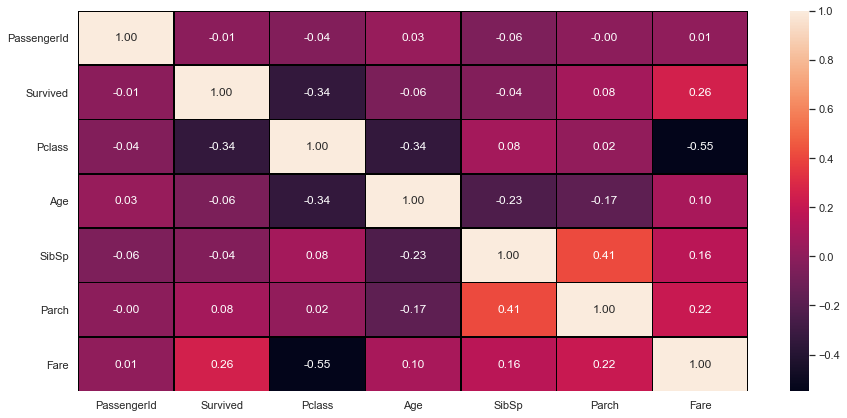

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

The most positively correlated is Fare column with the target column survived.so it is clear that people who payed more are survived and they had luxury staying too.The  Pclass column is most negatively correlated  with suvived column.if Pclass increases like to third class people survival rate will be low 

In [36]:
df1.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familysize,Alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.361582,338.528620,32.204208,1.536476,0.904602,0.602694
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.019697,200.850657,49.693429,0.791503,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,158.500000,7.910400,1.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,28.000000,337.000000,14.454200,2.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,519.500000,31.000000,2.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,680.000000,512.329200,2.000000,10.000000,1.000000


Here Age,Familysize,Fare are  only number type columns and has little skewness.and their mean and std dev are also not much close to zero too

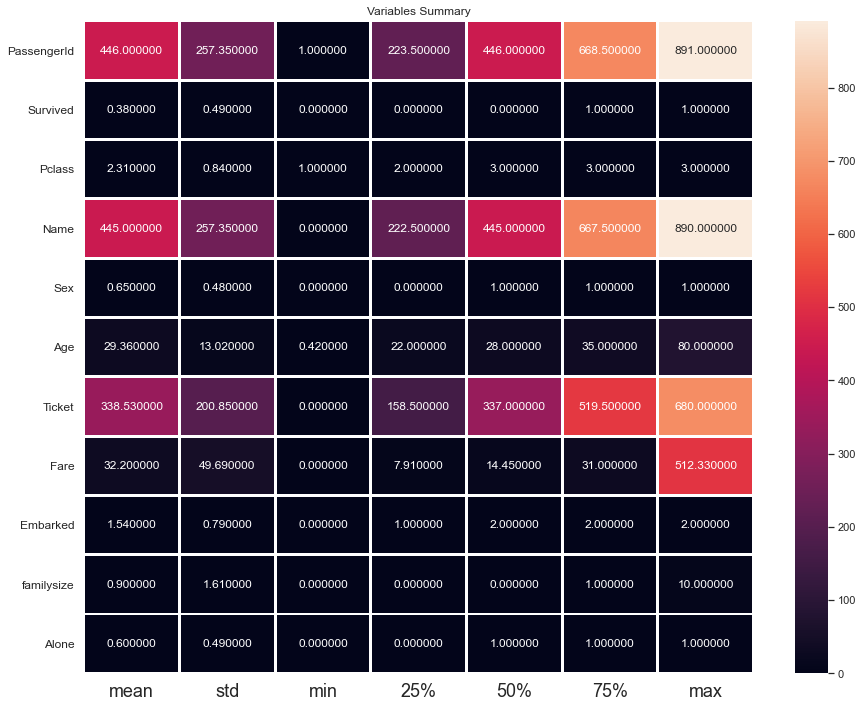

In [37]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df1.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

Here Age,Familysize,Fare are only number type columns and has little skewness.and their mean and std dev are also not much close to zero too.they may have outliers in it

<AxesSubplot:xlabel='Age', ylabel='Count'>

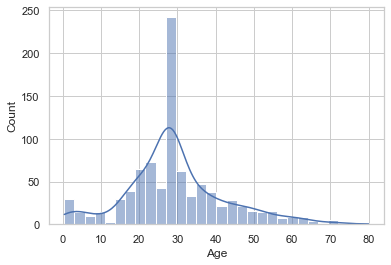

In [38]:
sns.histplot(data=df, x="Age", kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

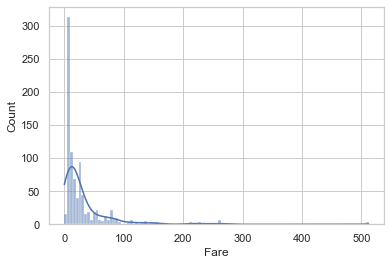

In [39]:
sns.histplot(data=df, x="Fare", kde=True)

Age and Fare has little skewness due to outliers

In [40]:
df1.isnull().sum()#check null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
familysize     0
Alone          0
dtype: int64

In [41]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
df1.shape

(891, 11)

In [43]:
df1.shape[1]

11

In [44]:
#calculates vif
def calc_vif(df1):
    vif=pd.DataFrame()
    vif['Variables']=df1.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df1.values,i)for i in range(df1.shape[1])]
    return(vif)


calc_vif(df1)

,Variables,VIF FACTOR
0,PassengerId,3.830960
1,Survived,2.021885
2,Pclass,10.848010
3,Name,3.865117
4,Sex,3.875125
5,Age,5.484273
6,Ticket,4.525624
7,Fare,2.060326
8,Embarked,4.868546
9,familysize,2.813276


columns are having vIF in correct range only.no need to drop

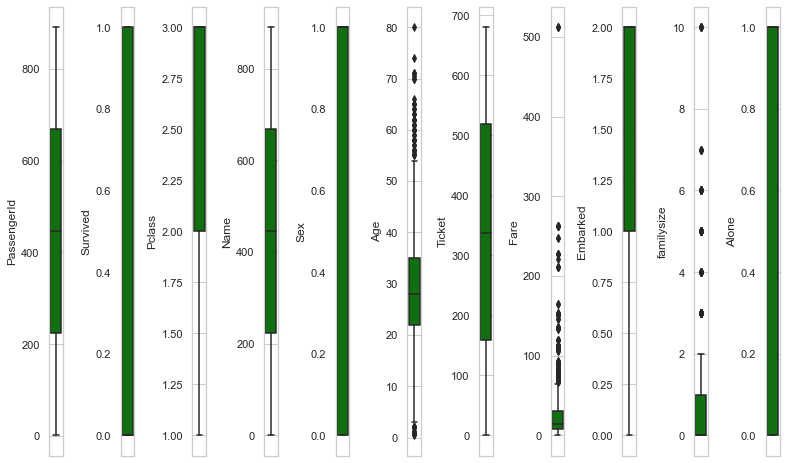

In [45]:
#check outliers
collist=df1.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df1[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [46]:
df1.skew() #checks skewness

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.510245
Ticket         0.000246
Fare           4.787317
Embarked      -1.264823
familysize     2.727441
Alone         -0.420431
dtype: float64

#checking Z-score to remove outliers

In [47]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df1))
z.shape


(891, 11)

In [48]:
threshold=3
print(np.where(z>3))

(array([ 13,  25,  27,  59,  68,  71,  88,  96, 116, 118, 119, 159, 180,
       182, 201, 233, 258, 261, 299, 311, 324, 341, 377, 380, 386, 438,
       480, 493, 527, 541, 542, 557, 610, 630, 672, 678, 679, 683, 689,
       700, 716, 730, 737, 742, 745, 779, 792, 813, 846, 850, 851, 863],
      dtype=int64), array([9, 9, 7, 9, 9, 9, 7, 5, 5, 7, 9, 9, 9, 9, 9, 9, 7, 9, 7, 7, 9, 7,
       7, 7, 9, 7, 9, 5, 7, 9, 9, 7, 9, 5, 5, 9, 7, 9, 7, 7, 7, 7, 7, 7,
       5, 7, 9, 9, 9, 9, 5, 9], dtype=int64))


In [49]:
df_new=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df_new.shape)

(891, 11)
(839, 11)


some outliers got removed

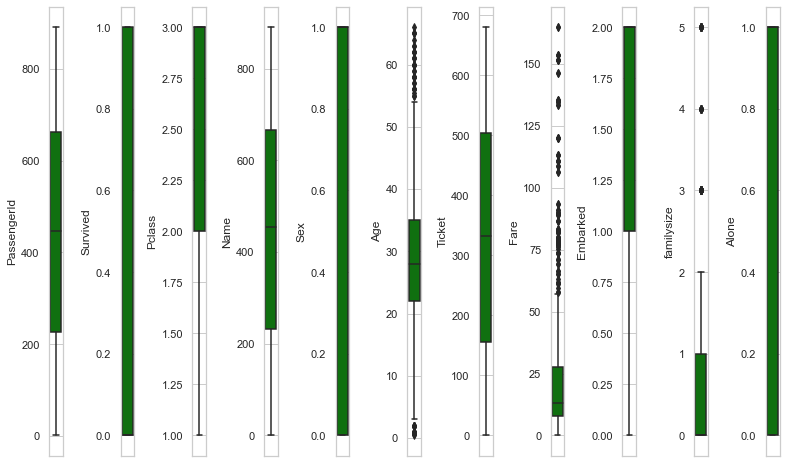

In [50]:
#checking outliers
collist=df_new.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [51]:
#finds data loss
loss_percent=(891-820)/(891*100)
print(loss_percent)

0.0007968574635241302


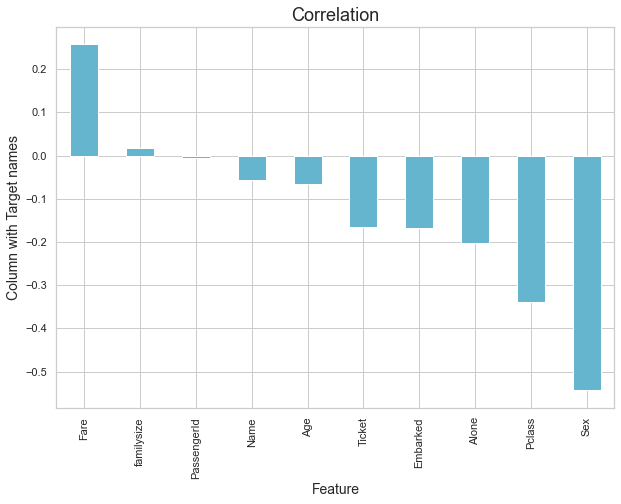

In [52]:
plt.figure(figsize=(10,7))
df1.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

data loss percentage is very low.data is cleaned also

In [53]:
df_new


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familysize,Alone
0,1,0,3,108,1,22.0,523,7.2500,2,1,0
1,2,1,1,190,0,38.0,596,71.2833,0,1,0
2,3,1,3,353,0,26.0,669,7.9250,2,0,1
3,4,1,1,272,0,35.0,49,53.1000,2,1,0
4,5,0,3,15,1,35.0,472,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,101,13.0000,2,0,1
887,888,1,1,303,0,19.0,14,30.0000,2,0,1
888,889,0,3,413,0,28.0,675,23.4500,2,3,0
889,890,1,1,81,1,26.0,8,30.0000,0,0,1


In [54]:
v=df_new[list(df_new.columns)[1]] 
df_new=df_new.drop(['Survived'],axis=1) 
df_new

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familysize,Alone
0,1,3,108,1,22.0,523,7.2500,2,1,0
1,2,1,190,0,38.0,596,71.2833,0,1,0
2,3,3,353,0,26.0,669,7.9250,2,0,1
3,4,1,272,0,35.0,49,53.1000,2,1,0
4,5,3,15,1,35.0,472,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.0,101,13.0000,2,0,1
887,888,1,303,0,19.0,14,30.0000,2,0,1
888,889,3,413,0,28.0,675,23.4500,2,3,0
889,890,1,81,1,26.0,8,30.0000,0,0,1


In [55]:
df_new.insert(10,'Survived',v) 
df_new


,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familysize,Alone,Survived
0,1,3,108,1,22.0,523,7.2500,2,1,0,0
1,2,1,190,0,38.0,596,71.2833,0,1,0,1
2,3,3,353,0,26.0,669,7.9250,2,0,1,1
3,4,1,272,0,35.0,49,53.1000,2,1,0,1
4,5,3,15,1,35.0,472,8.0500,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.0,101,13.0000,2,0,1,0
887,888,1,303,0,19.0,14,30.0000,2,0,1,1
888,889,3,413,0,28.0,675,23.4500,2,3,0,0
889,890,1,81,1,26.0,8,30.0000,0,0,1,1


In [56]:
df_new.shape

(839, 11)

In [57]:
#seggregate input data and output data
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [58]:
x

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familysize,Alone
0,1,3,108,1,22.0,523,7.2500,2,1,0
1,2,1,190,0,38.0,596,71.2833,0,1,0
2,3,3,353,0,26.0,669,7.9250,2,0,1
3,4,1,272,0,35.0,49,53.1000,2,1,0
4,5,3,15,1,35.0,472,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.0,101,13.0000,2,0,1
887,888,1,303,0,19.0,14,30.0000,2,0,1
888,889,3,413,0,28.0,675,23.4500,2,3,0
889,890,1,81,1,26.0,8,30.0000,0,0,1


In [59]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 839, dtype: int64

In [60]:
#removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.15442278,  0.86140101, -1.41068438, ...,  0.60916302,
         1.03736716, -1.28976434],
       [-2.13824345, -1.48370934, -0.99712545, ..., -1.7901761 ,
         1.03736716, -1.28976434],
       [-2.12356284,  0.86140101, -0.29588333, ...,  0.60916302,
        -0.76652775,  0.77533544],
       ...,
       [ 1.55829573,  0.86140101, -0.06155516, ...,  0.60916302,
         1.58048496, -1.28976434],
       [ 1.56131548, -1.48370934, -1.56386515, ..., -1.7901761 ,
        -0.76652775,  0.77533544],
       [ 1.56433425,  0.86140101, -0.85870576, ..., -1.2538574 ,
        -0.76652775,  0.77533544]])

In [61]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x = mmscaler.fit_transform(x)
x

array([[0.        , 1.        , 0.20925241, ..., 1.        , 0.73178946,
        0.        ],
       [0.00435074, 0.        , 0.31907229, ..., 0.        , 0.73178946,
        0.        ],
       [0.00829846, 1.        , 0.50528596, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.9983762 , 1.        , 0.56751142, ..., 1.        , 0.95211708,
        0.        ],
       [0.99918823, 0.        , 0.16857551, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.35582941, ..., 0.22352768, 0.        ,
        1.        ]])

LogisticRegression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [63]:
lr=LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')




In [64]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train,pred_train)*100,1)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test)*100,1)
        
        
        
   

#cv score

In [65]:
from sklearn.model_selection import cross_val_score
acc_score=accuracy_score(y_test,pred_test)
for j in range(2,10):
    cross_V_score=cross_val_score(lr,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score*100)
    print("accuracy score is:",acc_score*100)
    print("\n")
        

At cv:- 2
cross validation score is: 76.19047619047619
accuracy score is: 76.19047619047619


At cv:- 3
cross validation score is: 76.19047619047619
accuracy score is: 76.19047619047619


At cv:- 4
cross validation score is: 76.19047619047619
accuracy score is: 76.19047619047619


At cv:- 5
cross validation score is: 76.19047619047619
accuracy score is: 76.19047619047619


At cv:- 6
cross validation score is: 76.19047619047619
accuracy score is: 76.19047619047619


At cv:- 7
cross validation score is: 76.19047619047619
accuracy score is: 76.19047619047619


At cv:- 8
cross validation score is: 76.19047619047619
accuracy score is: 76.19047619047619


At cv:- 9
cross validation score is: 76.19047619047619
accuracy score is: 76.19047619047619




parameter tuning:

In [66]:
#performs GridsearchCV logistic regression
from sklearn.model_selection import GridSearchCV
parameters={'multi_class':['auto', 'ovr', 'multinomial'],'fit_intercept':[True,False],'random_state':list(range(0,10)),'max_iter':[100,150], 'tol':[0.0001,0.001,0.01]}
lr=LogisticRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'fit_intercept': True, 'max_iter': 100, 'multi_class': 'auto', 'random_state': 0, 'tol': 0.0001}


In [67]:
lr=LogisticRegression(fit_intercept= True, max_iter= 100, multi_class= 'auto', random_state=0, tol= 0.0001)
lr.fit(x_train,y_train)
pred_test_lr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
lr_score = lr.score(x_train,y_train)
lr_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 76.19047619047619
score of model is: 81.81818181818183


In [68]:
cv_score_lr=cross_val_score(lr,x,y,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 79.02480752780153


In [69]:
print(classification_report(y_test, pred_test)) 

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.66      0.64      0.65        58

    accuracy                           0.76       168
   macro avg       0.74      0.73      0.73       168
weighted avg       0.76      0.76      0.76       168



In [70]:
print(confusion_matrix(y_test,pred_test))

[[91 19]
 [21 37]]


In [71]:
print(accuracy_score(y_test,pred_test)*100)

76.19047619047619


AUc-ROC Curve

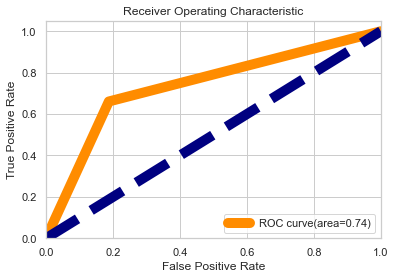

In [72]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

Area under the curve is 74% we got in logistic regression

RandomForestClassifier


In [73]:
# importing modules

from sklearn.ensemble import RandomForestClassifier

#creating RandomForestClassifier constructor
rf = RandomForestClassifier(random_state=5)
# fit data
rf.fit(x_train,y_train)
# predicting score
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
#calculates score of the model using score method
rf_score = rf.score(x_test,y_test)
print('score of model is : ',rf_score*100)


score of model is :  85.11904761904762


In [74]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_rf)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_rf)*100)

        

Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 85.11904761904762


In [75]:
#choosing best Random state
for i in range(0,100):
    rf.fit(x_train, y_train)
    pred_train_rf=rf.predict(x_train)
    pred_test_rf=rf.predict(x_test)
    if round(accuracy_score(y_train,pred_train_rf)*100,1)== round(accuracy_score(y_test,pred_test_rf)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train,pred_train_rf)*100)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test_rf)*100)
        

In [76]:
print("accuracy score is:",accuracy_score(y_test,pred_test_rf)*100)

accuracy score is: 85.11904761904762


In [77]:
#cross validation 
from sklearn.model_selection import cross_val_score
acc_score_rf=accuracy_score(y_test,pred_test_rf)
for j in range(2,10):
    cross_V_score=cross_val_score(rf,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score_rf*100)
    print("accuracy score is:",acc_score_rf*100)
    print("\n")
        

At cv:- 2
cross validation score is: 85.11904761904762
accuracy score is: 85.11904761904762


At cv:- 3
cross validation score is: 85.11904761904762
accuracy score is: 85.11904761904762


At cv:- 4
cross validation score is: 85.11904761904762
accuracy score is: 85.11904761904762


At cv:- 5
cross validation score is: 85.11904761904762
accuracy score is: 85.11904761904762


At cv:- 6
cross validation score is: 85.11904761904762
accuracy score is: 85.11904761904762


At cv:- 7
cross validation score is: 85.11904761904762
accuracy score is: 85.11904761904762


At cv:- 8
cross validation score is: 85.11904761904762
accuracy score is: 85.11904761904762


At cv:- 9
cross validation score is: 85.11904761904762
accuracy score is: 85.11904761904762




parameter tuning

In [78]:
#performs GridSearchCV on RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entropy'],'n_estimators':[50,100],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'bootstrap':[True,False]}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'n_estimators': 50, 'random_state': 2}


In [79]:
rf=RandomForestClassifier(criterion="entropy",max_features="auto",n_estimators=50,random_state=2,bootstrap="True",min_weight_fraction_leaf= 0.1)
rf.fit(x_train,y_train)
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
rf_score = rf.score(x_train,y_train)
rf_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 76.19047619047619
score of model is: 81.07302533532041


In [80]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 77.4750499001996


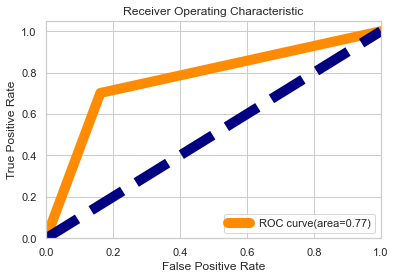

In [81]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_rf,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve er got is 77 %

In [82]:
print(confusion_matrix(y_test,pred_test_rf))

[[93 17]
 [18 40]]


In [83]:

print(classification_report(y_test,pred_test_rf))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.70      0.69      0.70        58

    accuracy                           0.79       168
   macro avg       0.77      0.77      0.77       168
weighted avg       0.79      0.79      0.79       168



DecisionTreeClassifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(random_state=1)
dtc.fit(x_train, y_train)
pred_test_dtc = dtc.predict(x_test)
pred_train_dtc = dtc.predict(x_train)
dtc_score = dtc.score(x_test,y_test)
print('score of model is : ',dtc_score*100)



score of model is :  77.38095238095238


In [85]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_dtc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_dtc)*100)


Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 77.38095238095238


parameter tuning

In [86]:
#perform gridsearchcv and cross val score on Decison Tree DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'max_depth':[11],'min_samples_split': [2,3,4],'min_samples_leaf':[1,2,3] }
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 3, 'splitter': 'random'}


In [87]:
dt=DecisionTreeClassifier(criterion='gini',max_features= 'auto',max_depth= 11 , random_state= 3, splitter= 'random',min_samples_leaf= 3,min_samples_split= 2)
dt.fit(x_train,y_train)
pred_test_dt=dt.predict(x_test)
pred_train_dt=dt.predict(x_train)
dt_score = dt.score(x_train,y_train)
dt_acc_score=accuracy_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)

Accuracy score is: 79.16666666666666
score of model is: 84.9478390461997


In [88]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 80.69218705446251


In [89]:
print(confusion_matrix(y_test,pred_test_dtc))

[[89 21]
 [17 41]]


In [90]:
print(classification_report(y_test,pred_test_dtc))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       110
           1       0.66      0.71      0.68        58

    accuracy                           0.77       168
   macro avg       0.75      0.76      0.75       168
weighted avg       0.78      0.77      0.78       168



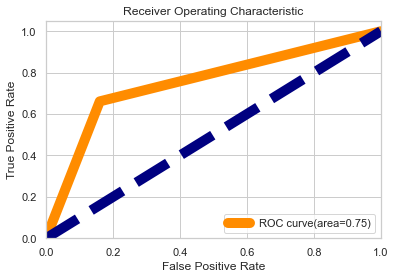

In [91]:
# ROC_AUC CURVE
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_dtc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve we got is 75%

KNeighborsClassifier

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred_test_knn = knn.predict(x_test)
pred_train_knn = knn.predict(x_train)
knn_score = knn.score(x_test,y_test)
print('score of model is : ',knn_score*100)



score of model is :  77.97619047619048


In [93]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_knn)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_knn)*100)


Accuracy Score of Training Data is: 84.79880774962743
Accuracy Score of Testing Data is: 77.97619047619048


parameter tuning

In [94]:
#perform gridsearchcv and cross val score on KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters={'n_neighbors':[4,5,6],'weights':['uniform', 'distance'],'leaf_size':[35,30],'n_jobs':[-1,1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] }
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'leaf_size': 35, 'n_jobs': -1, 'n_neighbors': 6, 'weights': 'uniform'}


In [95]:
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size= 35, n_jobs= -1, n_neighbors= 6, weights= 'uniform')
knn.fit(x_train,y_train)
pred_test_knn=knn.predict(x_test)
pred_train_knn=knn.predict(x_train)
knn_score = knn.score(x_train,y_train)
knn_acc_score=accuracy_score(y_test,pred_test_knn)
print("Accuracy score is:",knn_acc_score*100)
print("score of model is:",knn_score*100)

Accuracy score is: 76.78571428571429
score of model is: 84.50074515648286


In [96]:
cv_score_knn=cross_val_score(knn,x,y,cv=5)
cv_mean_knn=cv_score_knn.mean()
print("cv_mean is:",cv_mean_knn*100)

cv_mean is: 81.04719133162244


In [97]:
print(confusion_matrix(y_test,pred_test_knn))

[[96 14]
 [25 33]]


In [98]:
print(classification_report(y_test,pred_test_knn))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       110
           1       0.70      0.57      0.63        58

    accuracy                           0.77       168
   macro avg       0.75      0.72      0.73       168
weighted avg       0.76      0.77      0.76       168



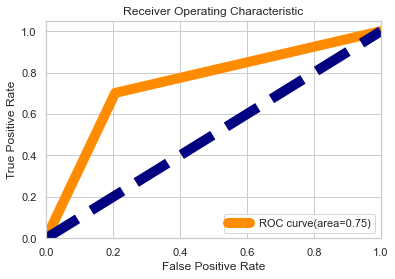

In [99]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_knn,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve we got is 75%

GaussianNB

In [100]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train, y_train)
pred_test_gnb = gnb.predict(x_test)
pred_train_gnb = gnb.predict(x_train)
gnb_score = gnb.score(x_test,y_test)
print('score of model is : ',gnb_score*100)

score of model is :  78.57142857142857


In [101]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_gnb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gnb)*100)


Accuracy Score of Training Data is: 77.19821162444114
Accuracy Score of Testing Data is: 78.57142857142857


parameter tuning

In [102]:
#perform gridsearchcv and cross val score on GaussianNB
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb=GaussianNB() 
clf = GridSearchCV(estimator=gnb, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
clf.fit(x_train,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.15199110829529336}


In [103]:
gnb=GaussianNB(var_smoothing=0.15199110829529336)
gnb.fit(x_train,y_train)
pred_test_gnb=gnb.predict(x_test)
pred_train_gnb=gnb.predict(x_train)
gnb_score = gnb.score(x_train,y_train)
gnb_acc_score=accuracy_score(y_test,pred_test_gnb)
print("Accuracy score is:",gnb_acc_score*100)
print("score of model is:",gnb_score*100)

Accuracy score is: 79.16666666666666
score of model is: 79.43368107302533


In [104]:
cv_score_gnb=cross_val_score(gnb,x,y,cv=5)
cv_mean_gnb=cv_score_gnb.mean()
print("cv_mean is:",cv_mean_gnb*100)

cv_mean is: 77.4764756201882


In [105]:
print(confusion_matrix(y_test,pred_test_gnb))

[[92 18]
 [17 41]]


In [106]:
print(classification_report(y_test,pred_test_gnb))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.69      0.71      0.70        58

    accuracy                           0.79       168
   macro avg       0.77      0.77      0.77       168
weighted avg       0.79      0.79      0.79       168



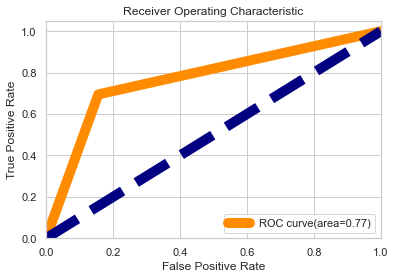

In [107]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_gnb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 77%

SVC

In [108]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)
pred_test_svc = svc.predict(x_test)
pred_train_svc = svc.predict(x_train)
svc_score = svc.score(x_test,y_test)
print('score of model is : ',svc_score*100)



score of model is :  79.76190476190477


In [109]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_svc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_svc)*100)


Accuracy Score of Training Data is: 83.4575260804769
Accuracy Score of Testing Data is: 79.76190476190477


parameter tuning

In [110]:
#perform gridsearchcv and cross val score on Support Vector classifier

parameters ={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale', 'auto'],'tol':[0.01,0.0001,0.001],'shrinking':[True,False],'degree':[3,4,5],'max_iter':[1,2,-1],'probability':[True,False]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'shrinking': True, 'tol': 0.01}


In [111]:
svc=SVC(kernel='rbf',gamma='scale',degree= 3,max_iter= -1, probability= True, shrinking= True, tol= 0.01)
svc.fit(x_train,y_train)
pred_test_svc=svc.predict(x_test)
pred_train_svc=svc.predict(x_train)
svc_score = svc.score(x_train,y_train)
svc_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",svc_acc_score*100)
print("score of model is:",svc_score*100)

Accuracy score is: 76.19047619047619
score of model is: 83.4575260804769


In [112]:
cv_score_svc=cross_val_score(svc,x,y,cv=5)
cv_mean_svc=cv_score_svc.mean()
print("cv_mean is:",cv_mean_svc*100)

cv_mean is: 81.52480752780153


In [113]:
print(confusion_matrix(y_test,pred_test_svc))

[[95 15]
 [19 39]]


In [114]:
print(classification_report(y_test,pred_test_svc))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.72      0.67      0.70        58

    accuracy                           0.80       168
   macro avg       0.78      0.77      0.77       168
weighted avg       0.79      0.80      0.80       168



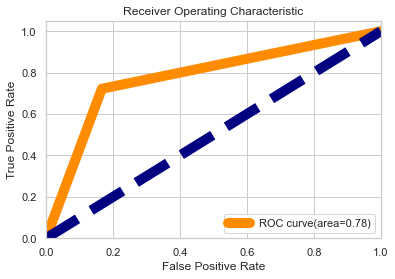

In [115]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_svc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 77%

In [116]:
#Gradient Boosting Classifier

Gradient Boosting Classifier

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=7)
gb.fit(x_train, y_train)
pred_test_gb = gb.predict(x_test)
pred_train_gb = gb.predict(x_train)
gb_score = gb.score(x_test,y_test)
print('score of model is : ',gb_score*100)




score of model is :  80.95238095238095


In [118]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_gb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gb)*100)


Accuracy Score of Training Data is: 92.69746646795826
Accuracy Score of Testing Data is: 80.95238095238095


parameter tuning

In [119]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['friedman_mse', 'mse', 'mae'],'n_estimators':[50,100],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'max_depth':[3,4,5] }
gb=GradientBoostingClassifier()
clf=GridSearchCV(gb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'criterion': 'friedman_mse', 'max_depth': 4, 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100, 'random_state': 0}


In [120]:
gb=GradientBoostingClassifier(criterion="friedman_mse",max_features="auto",n_estimators=100,random_state=0,max_depth= 4,min_weight_fraction_leaf= 0.1)
gb.fit(x_train,y_train)
pred_test_gb=gb.predict(x_test)
pred_train_gb=gb.predict(x_train)
gb_score = gb.score(x_train,y_train)
gb_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",gb_acc_score*100)
print("score of model is:",gb_score*100)

Accuracy score is: 76.19047619047619
score of model is: 88.82265275707898


In [121]:
cv_score_gb=cross_val_score(gb,x,y,cv=5)
cv_mean_gb=cv_score_gb.mean()
print("cv_mean is:",cv_mean_gb*100)

cv_mean is: 81.64242942686056


In [122]:
print(confusion_matrix(y_test,pred_test_gb))

[[93 17]
 [17 41]]


In [123]:
print(classification_report(y_test,pred_test_gb))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.71      0.71      0.71        58

    accuracy                           0.80       168
   macro avg       0.78      0.78      0.78       168
weighted avg       0.80      0.80      0.80       168



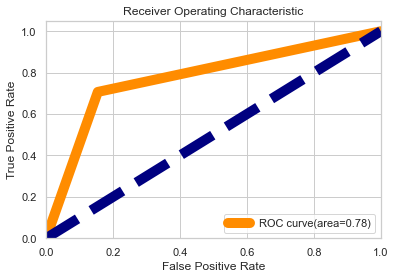

In [124]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_gb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 78%

Light Gradient Boosting Classifier

In [125]:
!pip install lightgbm

In [126]:
#Light Gradient Boosting Classifier

In [127]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
pred_test_lgbm = lgbm.predict(x_test)
pred_train_lgbm = lgbm.predict(x_train)
lgbm_score = lgbm.score(x_test,y_test)
print('score of model is : ',lgbm_score*100)



score of model is :  80.95238095238095


In [128]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_lgbm)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_lgbm)*100)


Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 80.95238095238095


In [129]:
print(confusion_matrix(y_test,pred_test_lgbm))

[[95 15]
 [17 41]]


In [130]:
print(classification_report(y_test,pred_test_lgbm))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.73      0.71      0.72        58

    accuracy                           0.81       168
   macro avg       0.79      0.79      0.79       168
weighted avg       0.81      0.81      0.81       168



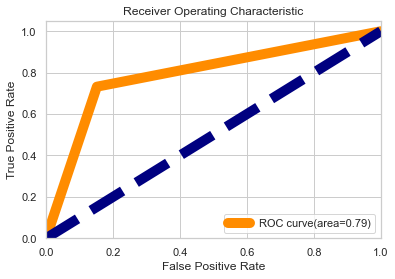

In [131]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_lgbm,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 79%

CatBoostClassifier

In [132]:
!pip install catboost

In [133]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train, y_train)
pred_test_cat = cat.predict(x_test)
pred_train_cat = cat.predict(x_train)
cat_score = cat.score(x_test,y_test)
print('score of model is : ',cat_score*100)



Learning rate set to 0.008688
0:	learn: 0.6878687	total: 140ms	remaining: 2m 19s
1:	learn: 0.6823596	total: 141ms	remaining: 1m 10s
2:	learn: 0.6780926	total: 142ms	remaining: 47.3s
3:	learn: 0.6720371	total: 143ms	remaining: 35.7s
4:	learn: 0.6678204	total: 144ms	remaining: 28.7s
5:	learn: 0.6635513	total: 145ms	remaining: 24s
6:	learn: 0.6588998	total: 146ms	remaining: 20.7s
7:	learn: 0.6550691	total: 147ms	remaining: 18.2s
8:	learn: 0.6501861	total: 148ms	remaining: 16.2s
9:	learn: 0.6463174	total: 148ms	remaining: 14.7s
10:	learn: 0.6429051	total: 149ms	remaining: 13.4s
11:	learn: 0.6383844	total: 150ms	remaining: 12.3s
12:	learn: 0.6328235	total: 151ms	remaining: 11.4s
13:	learn: 0.6282065	total: 152ms	remaining: 10.7s
14:	learn: 0.6233557	total: 153ms	remaining: 10s
15:	learn: 0.6190270	total: 154ms	remaining: 9.45s
16:	learn: 0.6153257	total: 155ms	remaining: 8.94s
17:	learn: 0.6111873	total: 156ms	remaining: 8.49s
18:	learn: 0.6071035	total: 157ms	remaining: 8.09s
19:	learn: 0.

In [134]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_cat)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_cat)*100)


Accuracy Score of Training Data is: 95.67809239940388
Accuracy Score of Testing Data is: 80.95238095238095


In [135]:
print(confusion_matrix(y_test,pred_test_cat))

[[95 15]
 [17 41]]


In [136]:
print(classification_report(y_test,pred_test_cat))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.73      0.71      0.72        58

    accuracy                           0.81       168
   macro avg       0.79      0.79      0.79       168
weighted avg       0.81      0.81      0.81       168



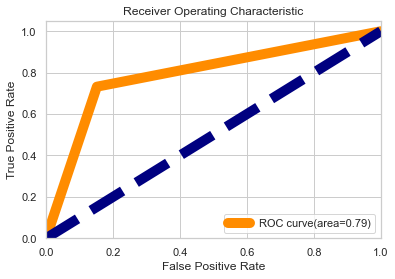

In [137]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_cat,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 79%

ExtraTreesClassifier

In [138]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)
pred_test_etc = etc.predict(x_test)
pred_train_etc = etc.predict(x_train)
etc_score = etc.score(x_test,y_test)
print('score of model is : ',etc_score*100)

score of model is :  80.95238095238095


In [139]:
print(confusion_matrix(y_test,pred_test_etc))

[[95 15]
 [17 41]]


In [140]:
print(classification_report(y_test,pred_test_etc))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.73      0.71      0.72        58

    accuracy                           0.81       168
   macro avg       0.79      0.79      0.79       168
weighted avg       0.81      0.81      0.81       168



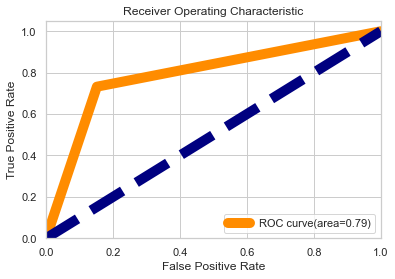

In [141]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_etc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 79%

AdaBoost

In [142]:
#AdaBoost

In [143]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=40,n_estimators=50,base_estimator=svc,algorithm='SAMME',learning_rate=0.05)
abc.fit(x_train, y_train)
pred_test_abc = abc.predict(x_test)
pred_train_abc = abc.predict(x_train)
abc_score = abc.score(x_test,y_test)
print('score of model is : ',abc_score*100)



score of model is :  65.47619047619048


In [144]:
print(confusion_matrix(y_test,pred_test_abc))

[[110   0]
 [ 58   0]]


In [145]:
print(classification_report(y_test,pred_test_abc))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       110
           1       0.00      0.00      0.00        58

    accuracy                           0.65       168
   macro avg       0.33      0.50      0.40       168
weighted avg       0.43      0.65      0.52       168



XGBoost

In [146]:
#XGBoost

In [147]:
!pip install xgboost

In [148]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
pred_test_xgb = xgb.predict(x_test)
pred_train_xgb = xgb.predict(x_train)
xgb_score = xgb.score(x_test,y_test)
print('score of model is : ',xgb_score*100)




[20:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of model is :  78.57142857142857


In [149]:
print(confusion_matrix(y_test,pred_test_xgb))

[[93 17]
 [19 39]]


In [150]:
print(classification_report(y_test,pred_test_xgb))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.70      0.67      0.68        58

    accuracy                           0.79       168
   macro avg       0.76      0.76      0.76       168
weighted avg       0.78      0.79      0.78       168



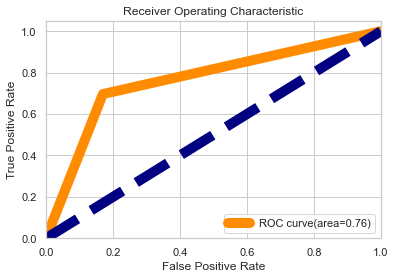

In [151]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_xgb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 76%

Voting classifier

In [152]:
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('knn',KNeighborsClassifier()))
estimator.append(('svc',SVC(gamma='auto',probability=True)))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator

[('knn', KNeighborsClassifier()),
 ('svc', SVC(gamma='auto', probability=True)),
 ('dtc', DecisionTreeClassifier())]

In [153]:
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(x_train,y_train)
y_pred=vot_hard.predict(x_test)
print(y_pred)
score=accuracy_score(y_test,y_pred)
print("score is:",score*100)

[1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1]
score is: 78.57142857142857


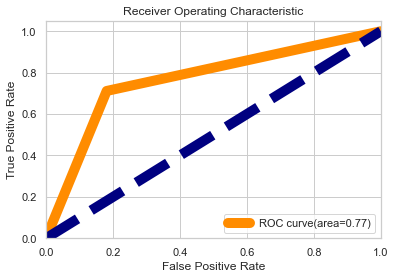

In [154]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 77%

conclusion:

output

In [168]:
import numpy as np
a=np.array(y_test)
predicted=np.array(etc.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


,Original,Predicted
0,1,1
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
163,0,0
164,1,0
165,0,1
166,0,0


save model

In [169]:
import pickle
filename='Red_Wine_Quality.pkl'
pickle.dump(etc,open(filename,'wb'))


In [170]:
models=['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC','Gradient Boosting Classifier','Light Gradient Boosting Classifier','CatBoostClassifier',
'ExtraTreesClassifier','AdaBoost','XGBoost','Voting classifier']
        

In [171]:
scores=[(accuracy_score(y_test,pred_test)*100),accuracy_score(y_test,pred_test_rf)*100,accuracy_score(y_test,pred_test_dtc)*100,
       accuracy_score(y_test,pred_test_knn)*100,accuracy_score(y_test,pred_test_gnb)*100,accuracy_score(y_test,pred_test_svc)*100,
       accuracy_score(y_test,pred_test_gb)*100,accuracy_score(y_test,pred_test_lgbm)*100,accuracy_score(y_test,pred_test_cat)*100,
       accuracy_score(y_test,pred_test_etc)*100,accuracy_score(y_test,pred_test_abc)*100,accuracy_score(y_test,pred_test_xgb)*100,accuracy_score(y_test,y_pred)*100]
scores

[76.19047619047619,
 79.16666666666666,
 77.38095238095238,
 76.78571428571429,
 79.16666666666666,
 79.76190476190477,
 79.76190476190477,
 80.95238095238095,
 80.95238095238095,
 80.95238095238095,
 65.47619047619048,
 78.57142857142857,
 78.57142857142857]

In [172]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [173]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.style.hide_index()

Nos,Model Names,Scores
1,LogisticRegression,76.190476
2,RandomForestClassifier,79.166667
3,DecisionTreeClassifier,77.380952
4,KNeighborsClassifier,76.785714
5,GaussianNB,79.166667
6,SVC,79.761905
7,Gradient Boosting Classifier,79.761905
8,Light Gradient Boosting Classifier,80.952381
9,CatBoostClassifier,80.952381
10,ExtraTreesClassifier,80.952381


Thus the ExtraTreeClassifier performs well among all so we saved that model

so from the above we can conclude the First class passenger 's survival rate is high than others